Union Find algoritması genellikle graph'lerdeki connectivity'i bulmaya yarayan algoritmadır. 

Example:

Let’s say there are 5 people A, B, C, D E. A is a friend of B, B is a friend of C and D is a friend of E. As we can see:
1) A, B and C are connected to each other.
2) D and E are connected to each other.

So we can use Union Find Data Structure to check whether one friend is connected to another in a direct or indirect way or not.

We have to perform two operations here :

Union (A, B) - connect two elements A and B. Find (A, B) - find, is there any path connecting two elements A and B.

We can use an array Arr to manage the connectivity of elements. Arr[i] will represent the parent of element i. With these Arr we can use find and union algorithms. 

Find(A, B) > Check if Arr[A] and Arr[B] have the same value.(If they have, that shows their parents are same and they are connected somehow.

Union(A, B) > Change all elements of Arr that have the same value as Arr[A], to Arr[B]. By doing these, we are changing the parent of all the childs of A.

Example: 

Initially there are 10 subsets and each subset has single element in it.
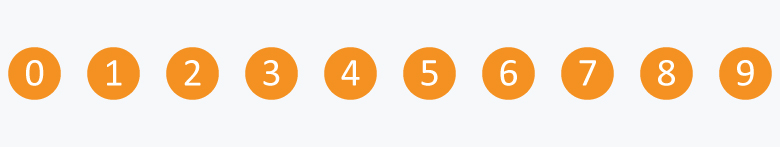

When each subset contains only single element, the array Arr is:
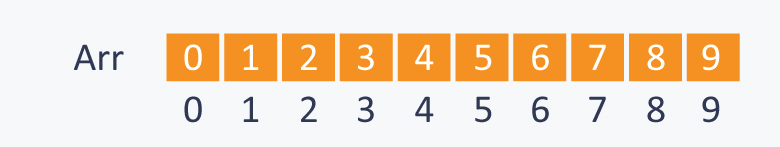

Let’s perform some Operations: 1) Union(2, 1)
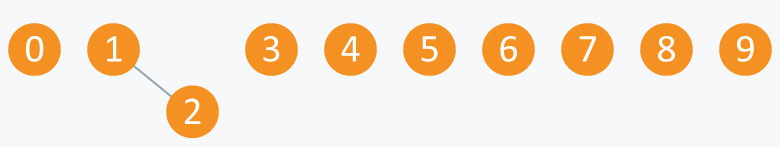

Arr will be:
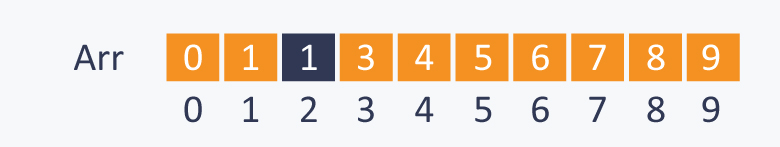

2) Union(4, 3)

3) Union(8, 4)

4) Union(9, 3)
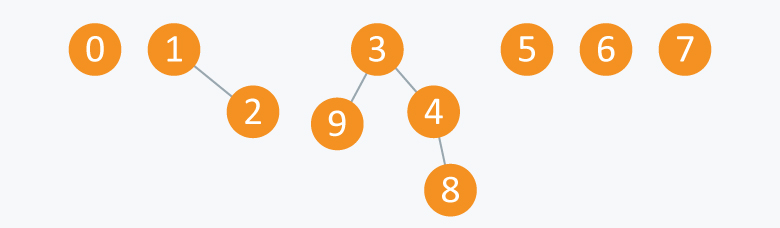
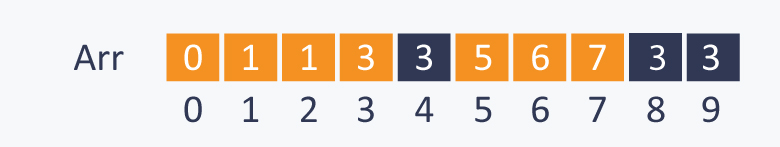


1) Find (0, 7) - as 0 and 7 are disconnected ,this will gives false result.

2) Find (8, 9) -though 8 and 9 are not connected directly ,but there exist a path connecting 8 and 9, so it will give us true result.

In [1]:
#Union Find koda uygulanması

#ilk önce Arr'i tanımlıyoruz.
def initialize(arr, N):
    for x in range(N):
        arr[x] = x

# A ve B'nin parenti eşit ise A ve B birbirine bir şekilde bağlıdır demektir. A ve B'nin parentlerinin eşit olup olmadığını kontrol ediyoruz.
def find(arr, A, B):
    return arr[A] == arr[B]

# Arr'de parent'i A'nın parentine eşit olan tüm elemanların parentini B'ninkine eşitliyoruz.
def union(arr, N, A, B):
    temp = arr[A]
    for i in range(N):
        if arr[i] == temp:
            arr[i] = arr[B]
#Bu algoritma tüm Arr elemanları üzerinde işlem yaptığı için tek bir union işlemi O(N) kadar süre alır.

Let’s try another approach:

Idea: Arr[ A ] is a parent of A.

Initially each element is the root of itself in all subsets, as Arr[ i ] = i, where i is element in the set, therefore root(i) = i.
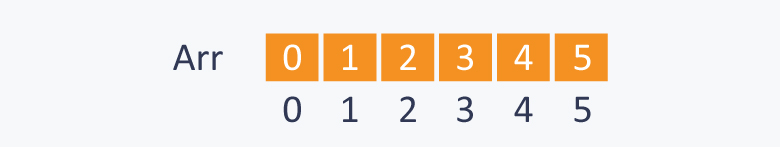

Performing Union(1, 0) will connect 1 to 0 and will set root(0) as the parent of root(1). It will make 0 as a root of subset containing elements {0, 1}.

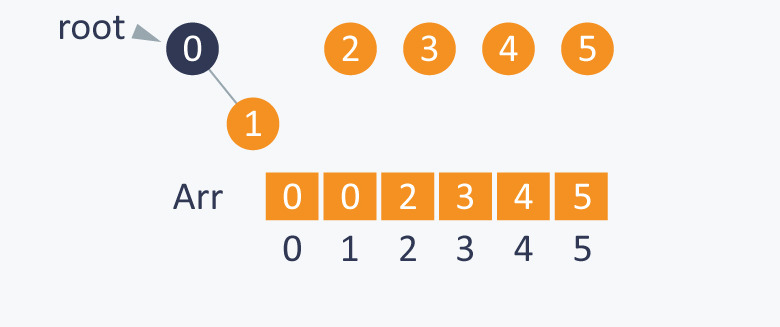

Performing Union(0, 2), will indirectly connect 0 to 2, by setting root(2) as the parent of root(0). Now 2 will be the root of subset containing elements {2, 0, 1}.

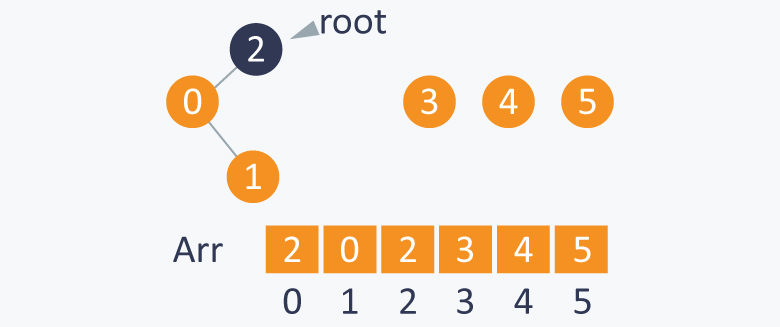

Similarly Union(3, 4) will indirectly connect 3 to 4, by setting root(4) as the parent of root(3).
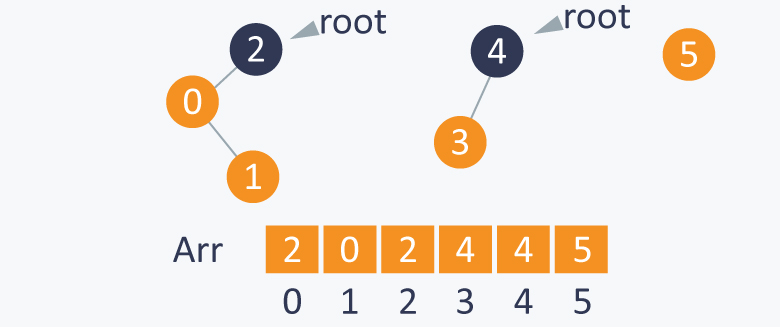

Now how to calculate root of a element ?
As we know that Arr[ i ] is the parent of i (where i is the element of set),then the root of i is Arr[ Arr[ Arr[ …...Arr[ i ]...... ] ] ] until Arr[ i ] is not equal to i. Simply we can run a loop until we get a element which is a parent of itself.


In [3]:
#Implementation of code

#finding root of an element.
def root(arr, i):
    #Arr[i] değeri kendisine eşit olan elemana kadar(parenti olmayan elemana kadar) gidiyoruz ve bulduğumuz değer root'a eşit oluyor.
    while arr[i] != i:
        i = arr[i]
    
    return i

#modified union function where we connect the elements by changing the root of one of the element
#A'nın root'unu B'ye eşitliyoruz. 
def union(arr, A, B):
    rootA = root(arr, A)
    rootB = root(arr, B)
    arr[rootA] = rootB

def find(A, B):
    return root(arr, A) == root(arr, B)  #if A and B have same root,means they are connected.


In worst case, this idea will also take linear time in connecting 2 elements and even in finding that if two elements are connected or not, it will take linear time.

A disadvantage is that while connecting two elements, we do not check which subset has more element than other and sometimes it creates a big problem as in worst case we have to perform approximately linear time operations.

We can avoid this, by keeping the track of size of each subset and then while connecting two elements, we can connect the root of subset having smaller number of elements to the root of subset having larger number of elements.

Here if we want to connect 1 and 5, then we will connect the root of Subset A (subset which contains 1) will be connected to root of Subset B (contains 5), this is because Subset A contains less number of elements than of Subset B.

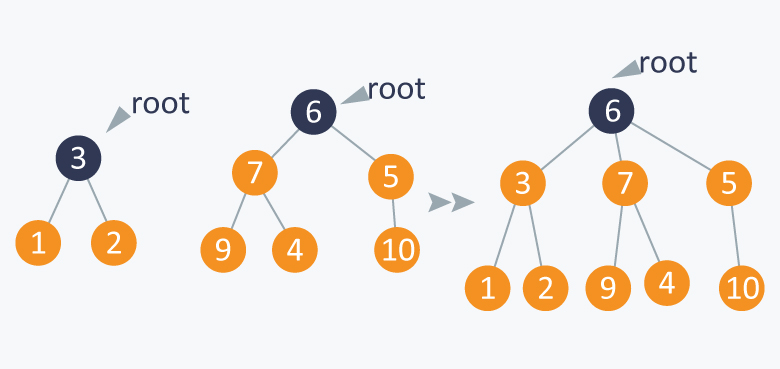


In [7]:
#Implementation

#modified initialize function:
def initialize(Arr, N):
    for i in range(N):
        Arr[i] = i
        size[i] = 1 # size array will keep track of sizes. 
        
#root() and find() function will be same as above.

#modified union function
def weighted_union(Arr, size, A, B):
    rootA = root(A)
    rootB = root(B)
    if rootA != rootB:
        if size[rootA] < size[rootB]:
            Arr[rootA] = Arr[rootB] # A'nın root'unun root'unu B'nin rootuna çeviriyoruz.
            size[rootB] += size[rootA]# B'nin size'ını arttırıyoruz.
        else: 
            Arr[rootB] = Arr[rootA]
            size[rootA] += size[rootB]
#Bu şekilde daha küçük olan subset'i daha büyük olana bağladığımız için işlemi daha hızlı gerçekleştirmiş oluyoruz.
#Maintaining a balance tree, will reduce complexity of union and find function from N to log2N.

## Applications

1) Connected components in a graph

2) Search for connected components in an image

3) Store additional information for each set

4) Compress jumps along a segment / Painting subarrays offline
